In [80]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

SMALL_FONT = {'family': 'monospace', 'size': 11}
MEDIUM_FONT = {'family': 'monospace', 'size': 14}
LARGE_FONT = {'family': 'monospace', 'weight': 'bold', 'size': 20 }

class EDA:

    def __init__(self, filename: str):
        with open(f'./pickles/{filename}.obj', 'rb') as f:
            self.df = pickle.load(f)

    def class_balance(self):
        mpl.rc('font', **MEDIUM_FONT)

        value_counts = self.df.value_counts()
        value_counts.index = np.array(['<50k', '>=50k'])

        """print the value counts for each of the class labels and display the values on a chart"""
        print(f'The class counts are:\n{value_counts.to_string()}')

        """create bar chart with class label as x, counts as y"""
        targets, counts = value_counts.index, value_counts.values
        fig, ax = plt.subplots(figsize=(15, 10))
        bar_chart = ax.bar(x=targets, height=counts)

        """calculate class percentages and print them atop each bar"""
        type_percents = [round(i/len(self.df), 2)*100 for i in counts]
        for i, bar in enumerate(bar_chart):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2., height,
                    type_percents[i],
                    ha='center', va='bottom')

        plt.title('Count by class label with percentages as text')
        plt.show()

    def corr_heatmap(self):
        corr = self.df.corr()
        plt.rc('font', size=16)
        plt.figure(figsize=(30,30))
        sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [81]:
X_train_eda = EDA('X_train')
y_train_eda = EDA('y_train')

In [82]:
X_train_eda.df.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,capital_change
0,1.725879,-0.981964,-0.982003,-0.982003,-0.922367,-0.201629,-0.867853,-0.936921,-0.982003,-0.982003,...,-0.870548,-0.870538,-0.874015,-0.874017,-0.884299,-0.876976,-0.838127,-0.949346,-0.868741,-0.084396
1,1.053560,-0.741859,-0.821858,-0.851925,-0.871531,-0.201629,-0.867853,-0.832258,-0.821858,-0.818407,...,-0.870548,-0.870538,-0.874015,-0.874017,-0.884299,-0.876976,-0.838127,1.180804,-0.883018,-0.084396
2,-0.739291,-0.981964,-0.982003,-0.982003,-0.983591,-0.201629,-0.998549,-0.974169,-0.982003,-0.982003,...,-0.951860,-0.953488,-0.943734,-0.926573,-0.884299,-0.876976,-0.838127,-0.949346,-0.868741,-0.084396
3,-1.142682,-0.981964,-0.982003,-0.982003,-1.000000,-0.201629,-0.867853,-0.974169,-0.982003,-0.982003,...,-0.870548,-0.870538,-0.874015,-0.874017,-0.884299,-0.876976,-1.000000,-0.949346,-0.883018,-0.084396
4,-1.097861,-0.981964,-0.982003,-0.982003,-1.000000,-0.201629,-0.867853,-0.974169,-0.982003,-0.982003,...,-0.870548,-0.870538,-0.874015,-0.874017,-0.884299,-0.876976,-1.000000,-0.949346,-0.883018,-0.084396


The class counts are:
<50k     187141
>=50k     12382


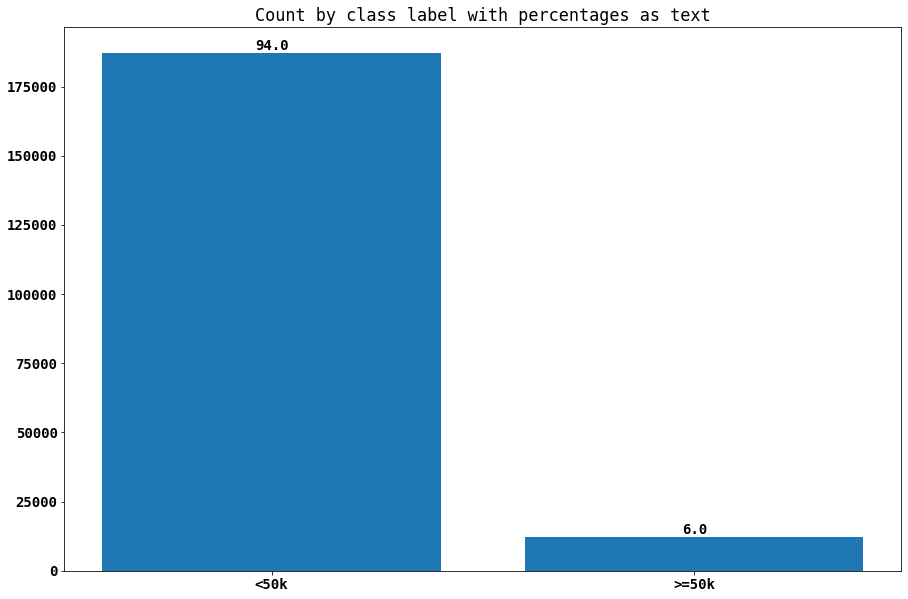

In [84]:
y_train_eda.class_balance()

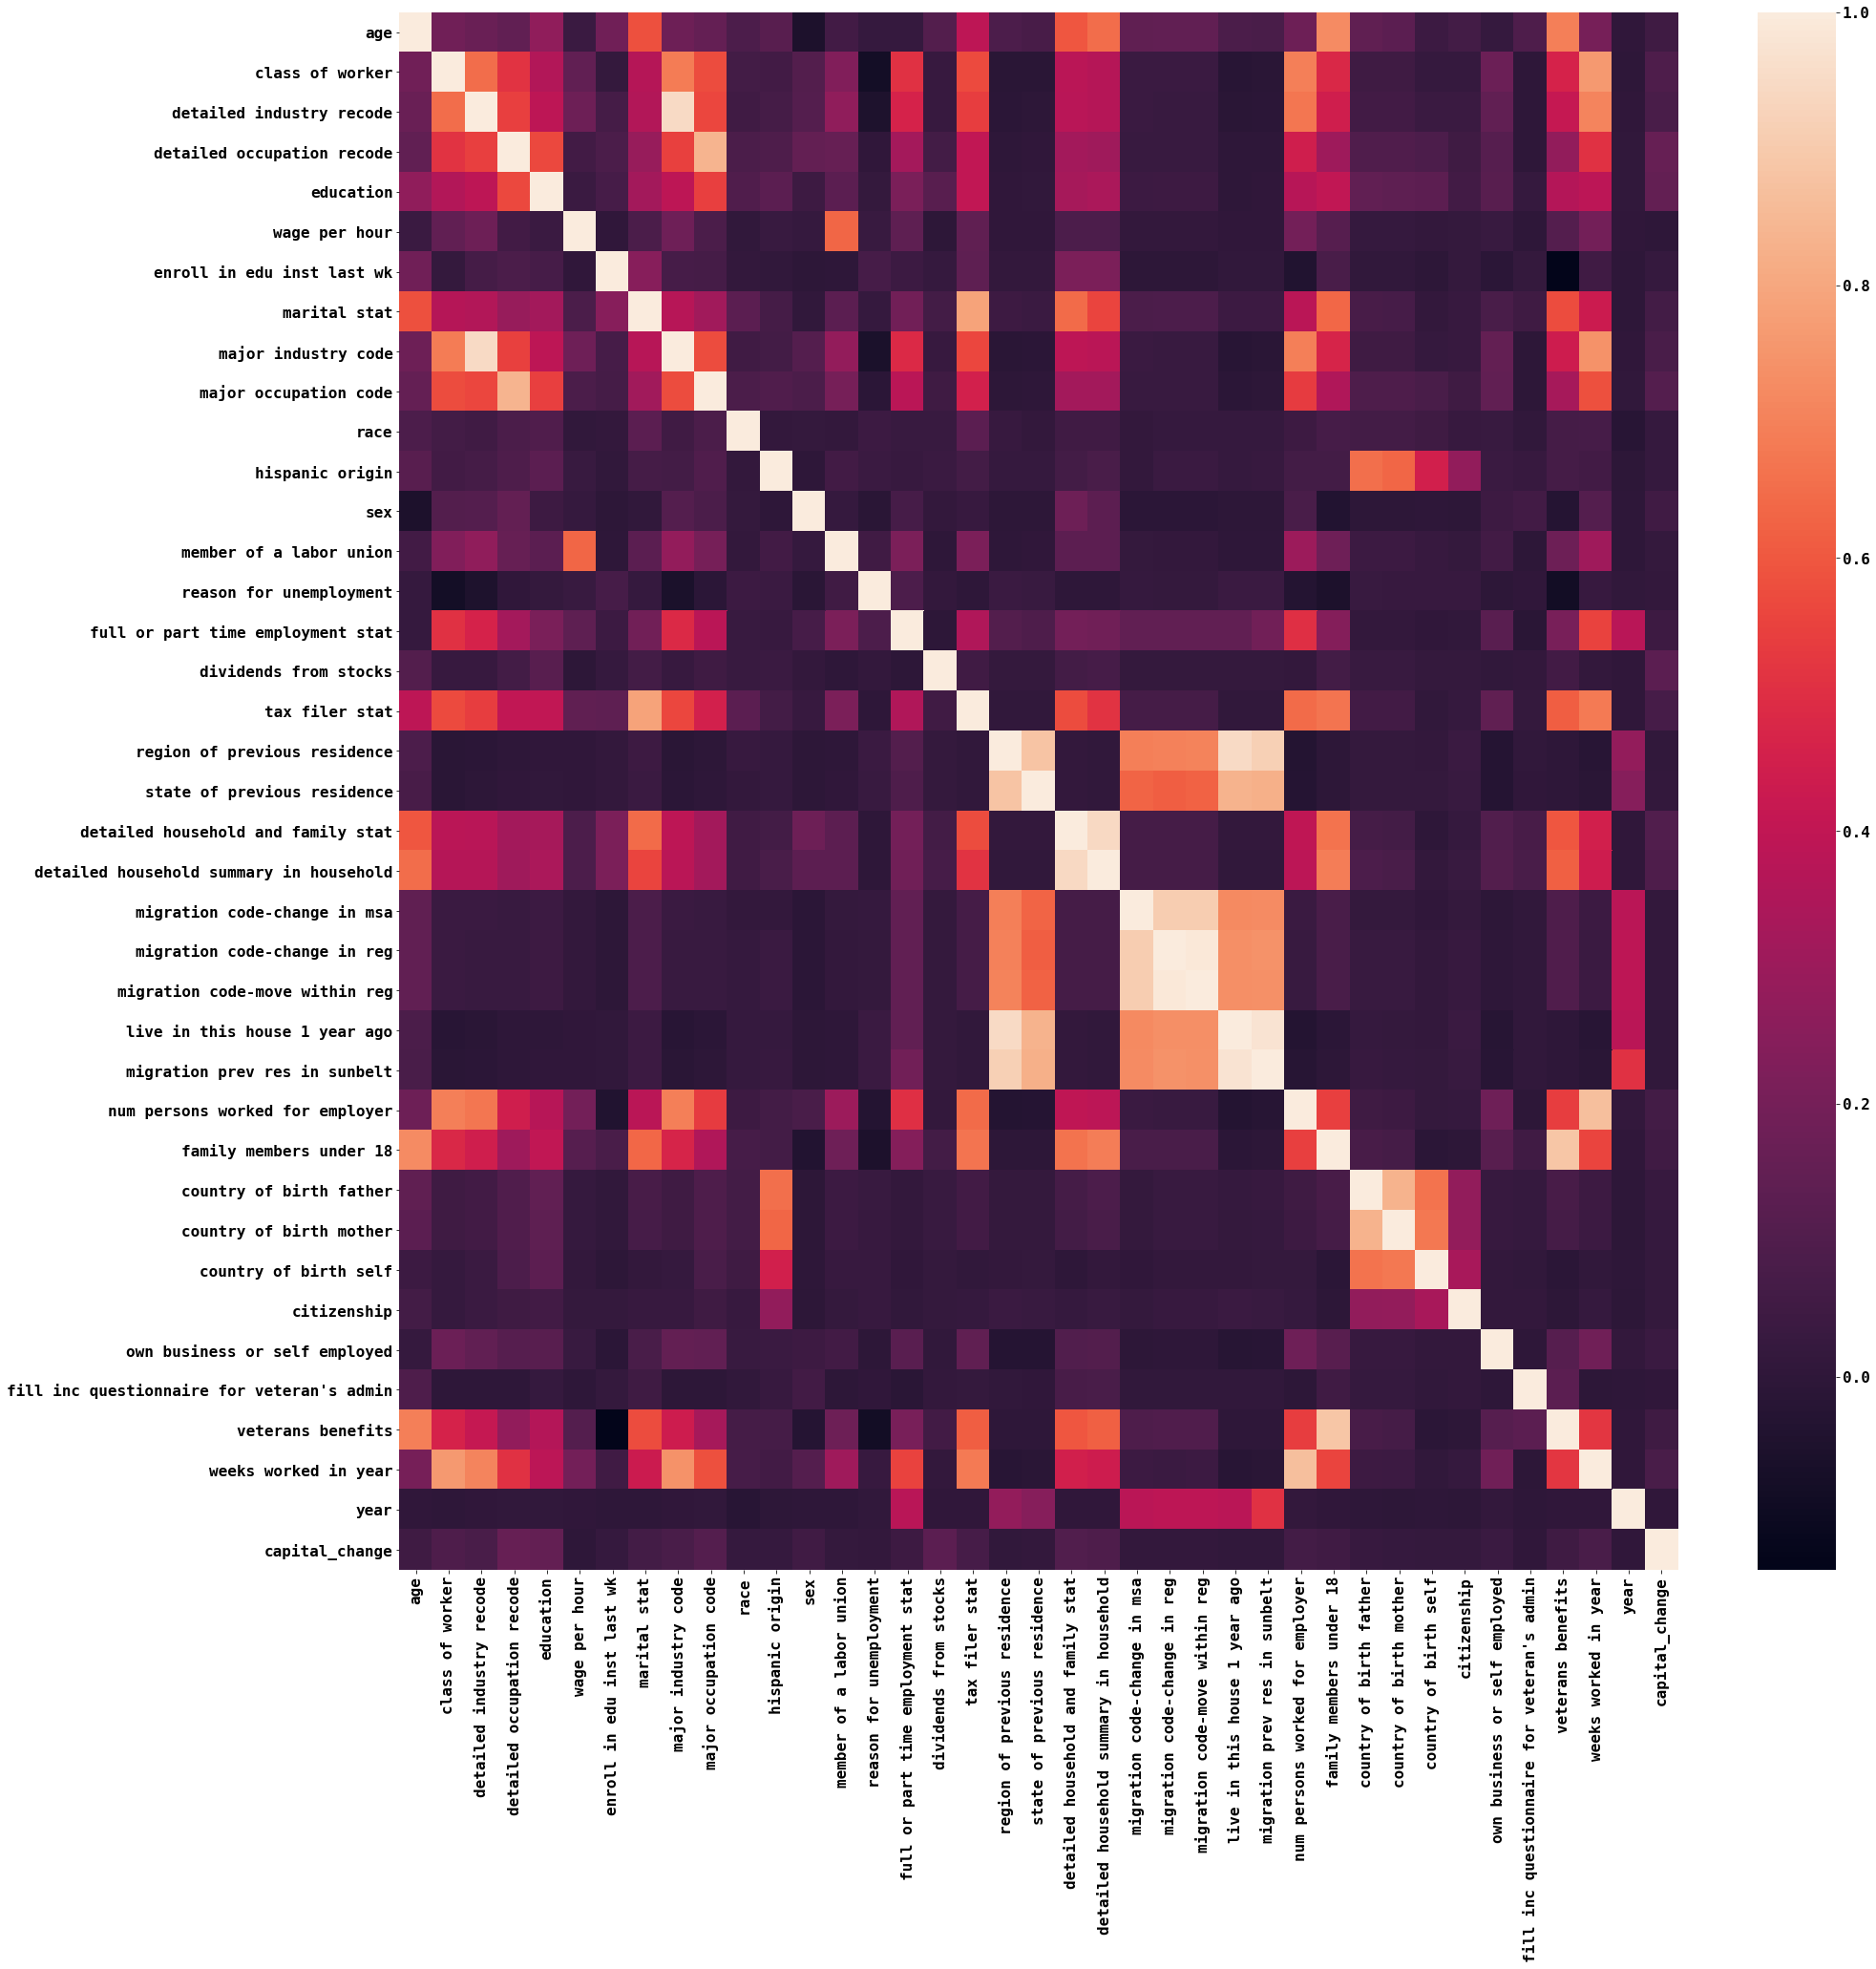

In [69]:
X_train_eda.corr_heatmap()